In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install dython


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import chi2
from dython import nominal

Reading Dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/care4better/second_task/dataset/Customer_Behaviour.csv')

In [ ]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
customer_data = dataset


Checking Missing values

In [ ]:
def find_missing_value(data):
  missed_val = pd.DataFrame({'column_name':[],'missing_value':[],'missing_percentage':[]})
  for col in data.columns:
    sum_missing_value = data[col].isnull().sum()
    percent_miss_value = round(sum_missing_value/data.shape[0]*100,2)
    missed_val = missed_val.append(dict(zip(missed_val.columns,[col,sum_missing_value,percent_miss_value])),ignore_index = True)
  return missed_val  

In [ ]:
house_missed_value = find_missing_value(customer_data)
display(house_missed_value[house_missed_value['missing_percentage']>0.0])
print("\n")
print(f"Number of columns with missing values:{str(house_missed_value[house_missed_value['missing_percentage']>0.0].shape[0])}")

,column_name,missing_value,missing_percentage




Number of columns with missing values:0


Checking duplicates

In [ ]:
duplicated_values = customer_data[customer_data.duplicated()]

In [ ]:
duplicated_values

,User ID,Gender,Age,EstimatedSalary,Purchased


Encoding categorical variable

In [ ]:
customer_data['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [ ]:
customer_data.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [ ]:
 customer_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


EDA

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    filename = 'Customer_data'
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

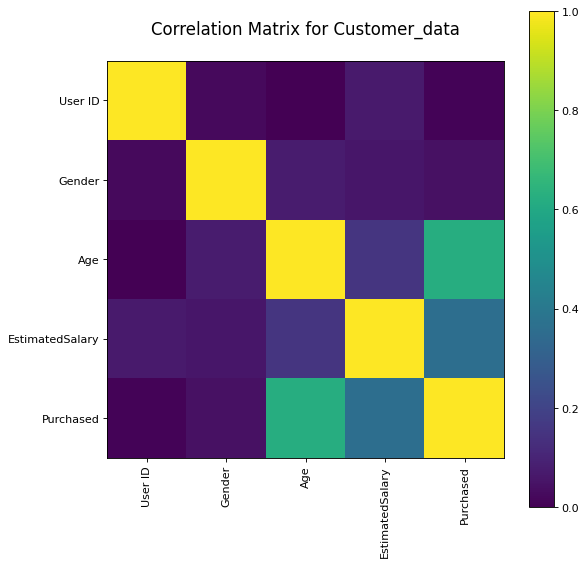

In [ ]:
plotCorrelationMatrix(customer_data, 8)


In [ ]:
X = customer_data[['Gender']]
y = customer_data['Purchased']
result = chi2(X, customer_data['Purchased'])
result

(array([0.35351632]), array([0.55212934]))

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


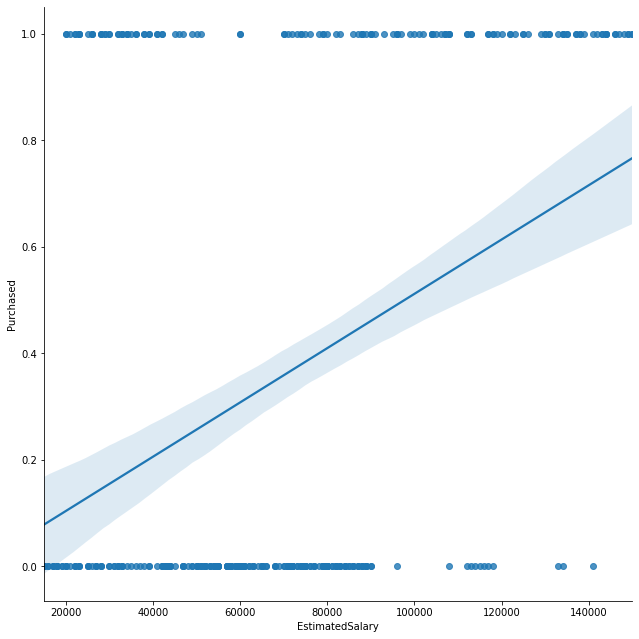

In [ ]:
sns.pairplot(data=customer_data, x_vars=['EstimatedSalary'], y_vars=['Purchased'], size=9, kind='reg')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


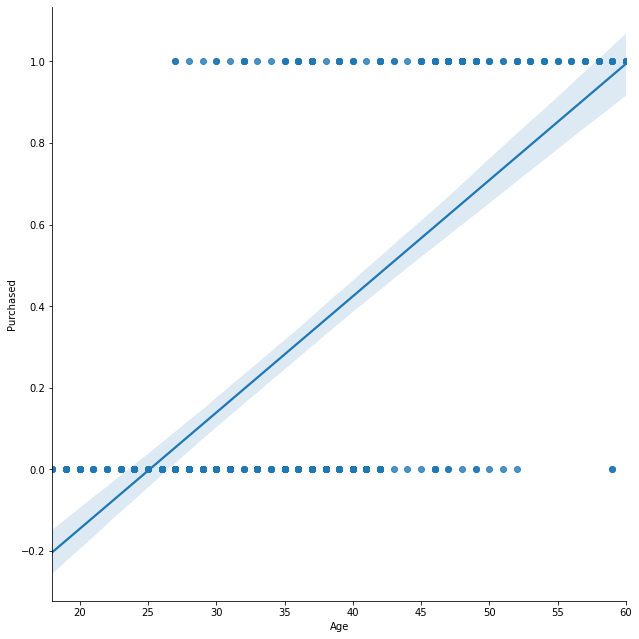

In [ ]:
sns.pairplot(data=customer_data, x_vars=['Age'], y_vars=['Purchased'], size=9, kind='reg')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


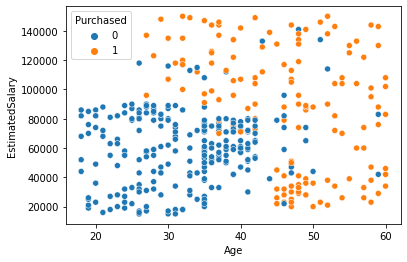

In [ ]:
sns.scatterplot(customer_data["Age"], customer_data["EstimatedSalary"], hue=customer_data["Purchased"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


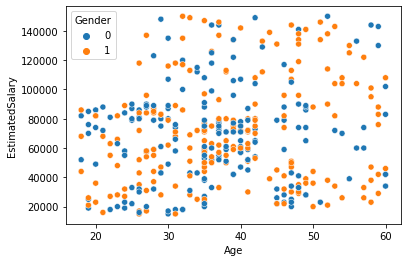

In [ ]:
sns.scatterplot(customer_data["Age"], customer_data["EstimatedSalary"], hue=customer_data["Gender"])


In [ ]:
customer_data

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


Spilliting Dataset

In [ ]:
final_dataset = customer_data

target = final_dataset['Purchased']
features = ['Age','Gender','EstimatedSalary']

In [ ]:
X = final_dataset[features]
y = target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy Metrics

In [ ]:
def accuracy_metrics(y_test,predictions):
  from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
  precision = precision_score(y_test,predictions)
  recall = recall_score(y_test,predictions)
  f1_score = f1_score(y_test,predictions)
  accuracy = accuracy_score(y_test,predictions)

  print('Accuracy score: {0:0.2f}'.format(
      accuracy))
  print('Average precision score: {0:0.2f}'.format(
      precision))
  print('recall score: {0:0.2f}'.format(
    recall))
  print('f1score: {0:0.2f}'.format(
    f1_score))

RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rndcl = RandomForestClassifier(n_estimators=100)

In [ ]:
rndcl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = rndcl.predict(X_test)

In [ ]:
accuracy_metrics(y_test,predictions)

Accuracy score: 0.90
Average precision score: 0.87
recall score: 0.87
f1score: 0.87


LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)

In [ ]:
accuracy_metrics(y_test,predict)

Accuracy score: 0.61
Average precision score: 0.00
recall score: 0.00
f1score: 0.00


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dcsn_tree = DecisionTreeClassifier()
dcsn_tree.fit(X_train,y_train)
pred = dcsn_tree.predict(X_test)

In [ ]:
accuracy_metrics(y_test,pred)

Accuracy score: 0.88
Average precision score: 0.83
recall score: 0.85
f1score: 0.84


K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predicted = knn.predict(X_test)

In [ ]:
accuracy_metrics(y_test,predicted)

Accuracy score: 0.82
Average precision score: 0.88
recall score: 0.62
f1score: 0.73


Support Vector Machine

In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)
p = svm.predict(X_test)

In [ ]:
accuracy_metrics(y_test,p)

Accuracy score: 0.73
Average precision score: 0.86
recall score: 0.38
f1score: 0.53


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
nv.fit(X_train,y_train)
pd = nv.predict(X_test)

In [ ]:
accuracy_metrics(y_test,pd)

Accuracy score: 0.93
Average precision score: 0.97
recall score: 0.83
f1score: 0.90
